<a href="https://colab.research.google.com/github/jay10440/full-statistical-projects/blob/main/Statistical_Report_New_Category_Type_Hurricane_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Storms.csv and Data Analysis

This is a fun little project to see if we could make non-integer predictions about categories of hurricanes using a multi-regression model. The data set comes from NOAA Atlantic hurricane database at https://www.nhc.noaa.gov/data/#hurdat.

This dataset has positions and attributes of storms from 1975-2021, but we're only going to consider the wind speeds (in knots) and pressure (in millibars) in our analysis of these new categories we will create.

## Loading In the Data Set
- For colab notebooks, we can drag the file over into our folders tab and load in the notebook. If we needed to do this from our computer, we'll need to mount the drive, or just use regular R, which we can do, but colab feels better right now XD

In [2]:
storms<-read.csv("storms.csv")

##Necessary Packages


In [30]:
library(tidyverse) #For like everything nice lol
library(lubridate) #For analysis, we can deal with the dates better using this.
#I would normally install the pacman package, but there's no real need here
#since we don't have a whole bunch of em.
install.packages("gridExtra") #For the fancy linear model graphs
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




##Taking a Quick Look at the Data

In [5]:
head(storms)
summary(storms)
str(storms)

,X,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NA,25,1013,NA,NA
2,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NA,25,1013,NA,NA
3,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NA,25,1013,NA,NA
4,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NA,25,1013,NA,NA
5,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NA,25,1012,NA,NA
6,6,Amy,1975,6,28,6,32.4,-78.7,tropical depression,NA,25,1012,NA,NA


       X             name                year          month       
 Min.   :    1   Length:19066       Min.   :1975   Min.   : 1.000  
 1st Qu.: 4767   Class :character   1st Qu.:1993   1st Qu.: 8.000  
 Median : 9534   Mode  :character   Median :2004   Median : 9.000  
 Mean   : 9534                      Mean   :2002   Mean   : 8.699  
 3rd Qu.:14300                      3rd Qu.:2012   3rd Qu.: 9.000  
 Max.   :19066                      Max.   :2021   Max.   :12.000  
                                                                   
      day             hour             lat             long        
 Min.   : 1.00   Min.   : 0.000   Min.   : 7.00   Min.   :-109.30  
 1st Qu.: 8.00   1st Qu.: 5.000   1st Qu.:18.40   1st Qu.: -78.70  
 Median :16.00   Median :12.000   Median :26.60   Median : -62.25  
 Mean   :15.78   Mean   : 9.094   Mean   :26.99   Mean   : -61.52  
 3rd Qu.:24.00   3rd Qu.:18.000   3rd Qu.:33.70   3rd Qu.: -45.60  
 Max.   :31.00   Max.   :23.000   Max.   :70.70 

'data.frame':	19066 obs. of  14 variables:
 $ X                           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name                        : chr  "Amy" "Amy" "Amy" "Amy" ...
 $ year                        : int  1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 ...
 $ month                       : int  6 6 6 6 6 6 6 6 6 6 ...
 $ day                         : int  27 27 27 27 28 28 28 28 29 29 ...
 $ hour                        : int  0 6 12 18 0 6 12 18 0 6 ...
 $ lat                         : num  27.5 28.5 29.5 30.5 31.5 32.4 33.3 34 34.4 34 ...
 $ long                        : num  -79 -79 -79 -79 -78.8 -78.7 -78 -77 -75.8 -74.8 ...
 $ status                      : chr  "tropical depression" "tropical depression" "tropical depression" "tropical depression" ...
 $ category                    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ wind                        : int  25 25 25 25 25 25 25 30 35 40 ...
 $ pressure                    : int  1013 1013 1013 1013 1012 1012 1011 1006 1004 1

##The Data Set

So this data set contains quite a few variables. In particular, the ones we want from this data set are the wind, pressure and category.

We might care more later about hurricane_force_diameter and how this might fit into the picture of predicting the rational categories, or haps the time of day, as this may affect the heat and energy of the hurricane, but for now, we'll keep things simple.

In [6]:
Wis.na(storms)
colSums(is.na(storms))

X,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE


X                         name 
                           0                            0 
                        year                        month 
                           0                            0 
                         day                         hour 
                           0                            0 
                         lat                         long 
                           0                            0 
                      status                     category 
                           0                        14382 
                        wind                     pressure 
                           0                            0 
tropicalstorm_force_diameter     hurricane_force_diameter 
                        9512                         9512

OK, so here's a fun idea. We create our categories for hurricanes that depends on things like its wind speed. But I'm curious to see if we can do the following:
- Turn categories into real valued number
- See if the wind and pressure can be predictors of this "new category" we're creating.

These pipelines lol...

In [11]:
realcategoryclassification<- storms %>%
  select(category, wind, pressure)
rcc<- realcategoryclassification

In [12]:
summary(rcc)

    category          wind           pressure     
 Min.   :1.000   Min.   : 10.00   Min.   : 882.0  
 1st Qu.:1.000   1st Qu.: 30.00   1st Qu.: 987.0  
 Median :1.000   Median : 45.00   Median :1000.0  
 Mean   :1.898   Mean   : 50.02   Mean   : 993.6  
 3rd Qu.:3.000   3rd Qu.: 65.00   3rd Qu.:1007.0  
 Max.   :5.000   Max.   :165.00   Max.   :1024.0  
 NA's   :14382                                    

In [14]:
colSums(is.na(rcc))
#I'm honestly not sure if that category is going to be a problem LOL.

category     wind pressure 
   14382        0        0

So basically, we don't want those NA values in there. This is fine, since we're only looking to "invent"a new type of category structure for hurricanes. To do this, we can take the NA values and define them as zeros.

Note, if we wanted to replace a number, we could do something like `rcc$Category==3 <- other value`

#A REALLY basic cleaning

In [23]:
rcc$category
rcc$category[is.na(rcc$category)]<- 0
rcc$category
colSums(is.na(rcc))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 1 1 1 1 3 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2
  [109] 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 1 1 2 2 3 3 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 1 1 1 1 1 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3
  [217] 3 4 4 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 3 3 3 2
  [253] 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 2 3 2 1 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 3 5 5 4 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
  [433] 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 1 2 3 3 3 3 3 1 1 1 1 2 2 3 4 4 4 3 1 1 0 0 0 0 0 0 0 0 0 0 0 1
  [541] 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 3 4 3 3 2 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 1 1 2 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 4 3 1 0 1 1 1 1 1 1 2 2 2 2 2 1 1
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 3 3 4 4 4
  [829] 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
  [865] 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0
  [901] 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 1 1 1 2 3 4 4 4 5 5 5 5 5 4 4 4 4 5 5 5 5 4 4 4 5 5 5 4 3 3 2 1
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 [1009] 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 3 3 3 2 2 2 2 1 2 2 2 2 1 1
 [1117] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 [1261] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [1405] 1 2 2 2 3 3 3 3 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 1 1 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 [1477] 2 2 2 3 4 3 3 3 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 1 1 1 2 2 1 1 2 2 2 2 2 3 3 3 3 3 3 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 [1585] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 [1657] 1 2 2 2 2 2 2 2 2 3 4 3 3 3 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 1 1 1 2 2 3 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 1 1 1 1 3 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2
  [109] 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 1 1 2 2 3 3 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 1 1 1 1 1 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3
  [217] 3 4 4 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 3 3 3 2
  [253] 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 2 3 2 1 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 3 5 5 4 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
  [433] 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 1 2 3 3 3 3 3 1 1 1 1 2 2 3 4 4 4 3 1 1 0 0 0 0 0 0 0 0 0 0 0 1
  [541] 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 3 4 3 3 2 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 1 1 2 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 4 3 1 0 1 1 1 1 1 1 2 2 2 2 2 1 1
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 3 3 4 4 4
  [829] 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
  [865] 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0
  [901] 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 1 1 1 2 3 4 4 4 5 5 5 5 5 4 4 4 4 5 5 5 5 4 4 4 5 5 5 4 3 3 2 1
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 [1009] 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 3 3 3 2 2 2 2 1 2 2 2 2 1 1
 [1117] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 [1261] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [1405] 1 2 2 2 3 3 3 3 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 1 1 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 [1477] 2 2 2 3 4 3 3 3 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 1 1 1 2 2 1 1 2 2 2 2 2 3 3 3 3 3 3 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 [1585] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 [1657] 1 2 2 2 2 2 2 2 2 3 4 3 3 3 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 1 1 1 2 2 3 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

category     wind pressure 
       0        0        0

In [24]:
head(rcc)
summary(rcc)

,category,wind,pressure
,<dbl>,<int>,<int>
1,0,25,1013
2,0,25,1013
3,0,25,1013
4,0,25,1013
5,0,25,1012
6,0,25,1012


    category           wind           pressure     
 Min.   :0.0000   Min.   : 10.00   Min.   : 882.0  
 1st Qu.:0.0000   1st Qu.: 30.00   1st Qu.: 987.0  
 Median :0.0000   Median : 45.00   Median :1000.0  
 Mean   :0.4664   Mean   : 50.02   Mean   : 993.6  
 3rd Qu.:0.0000   3rd Qu.: 65.00   3rd Qu.:1007.0  
 Max.   :5.0000   Max.   :165.00   Max.   :1024.0  

#Explorative Data Analysis

Below are some plots to just see what correlations exist. We expect some strangeness because of the categories and how they map to winds and pressures.

,category,wind,pressure
category,1.0000000,0.8947753,-0.8657554
wind,0.8947753,1.0000000,-0.9291815
pressure,-0.8657554,-0.9291815,1.0000000


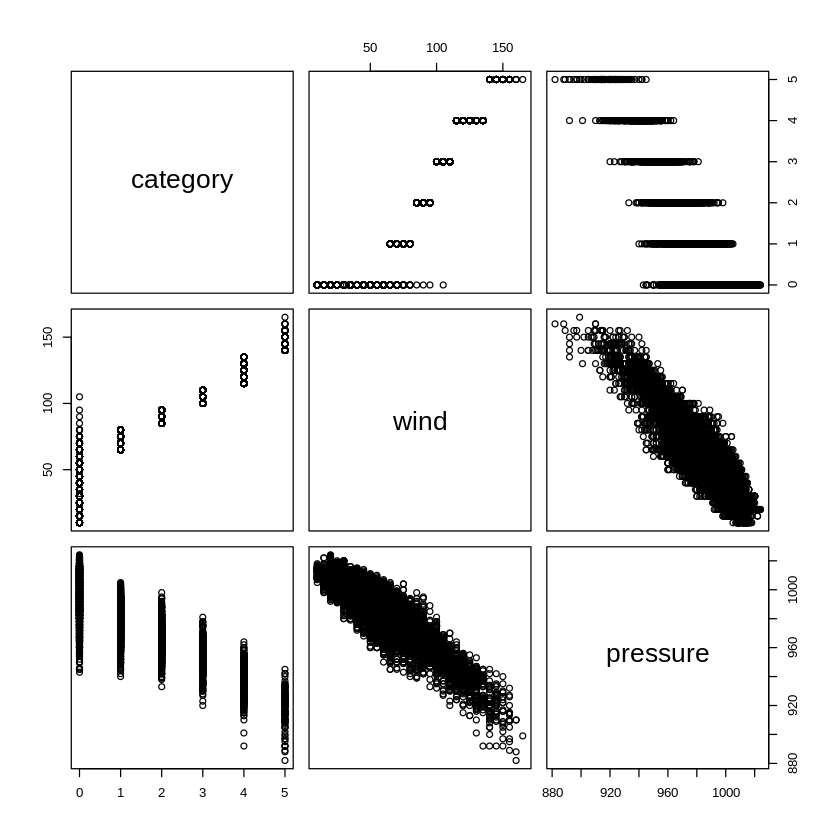

In [27]:
cor(rcc)
pairs(rcc[,c("category","wind","pressure")])

Observation: As we would expect, and has been studied for a very long time, there is an inverse relationship between the wind speed and pressure in a hurricane, and just in general for wind.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


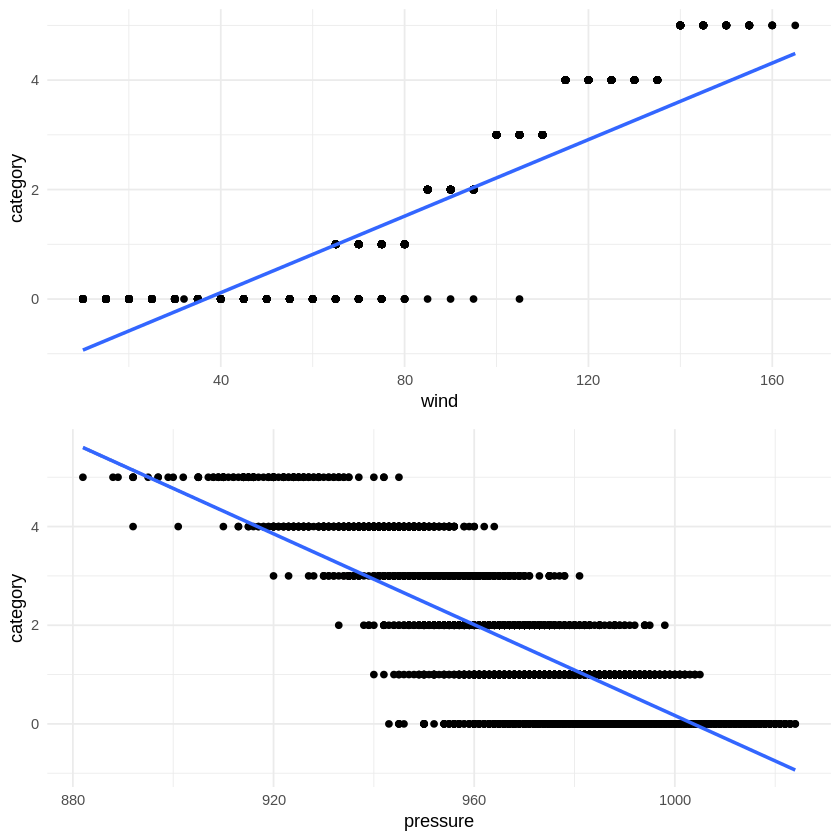

In [31]:
#Some Linear Model Plots with Confidence Intervals
plot1<-ggplot(rcc, aes(x=wind, y=category))+geom_point()+geom_smooth(method="lm")+theme_minimal()
plot2<-ggplot(rcc, aes(x=pressure, y=category))+geom_point()+geom_smooth(method="lm")+theme_minimal()
grid.arrange(plot1,plot2)

Here, we're going to create our multi-regression model:

$$category = \beta_1 (wind) + \beta_2 (pressure) + \beta_0$$

In [33]:
#Running the Linear Model:
linmodcats<- lm(category~wind + pressure, data=rcc)
summary(linmodcats)


Call:
lm(formula = category ~ wind + pressure, data = rcc)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29553 -0.29067  0.04793  0.27071  1.55949 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.4583737  0.4678063   26.63   <2e-16 ***
wind         0.0258376  0.0003344   77.26   <2e-16 ***
pressure    -0.0133705  0.0004551  -29.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4352 on 19063 degrees of freedom
Multiple R-squared:  0.8093,	Adjusted R-squared:  0.8092 
F-statistic: 4.044e+04 on 2 and 19063 DF,  p-value: < 2.2e-16


- Each of the variables are significantly significant (p<.05). Makes sense since wind and pressure are related.
- The $R^2$ value is .8893. Definitely a dependence. Is it a linear dependence? Doens't seem like it for sure.

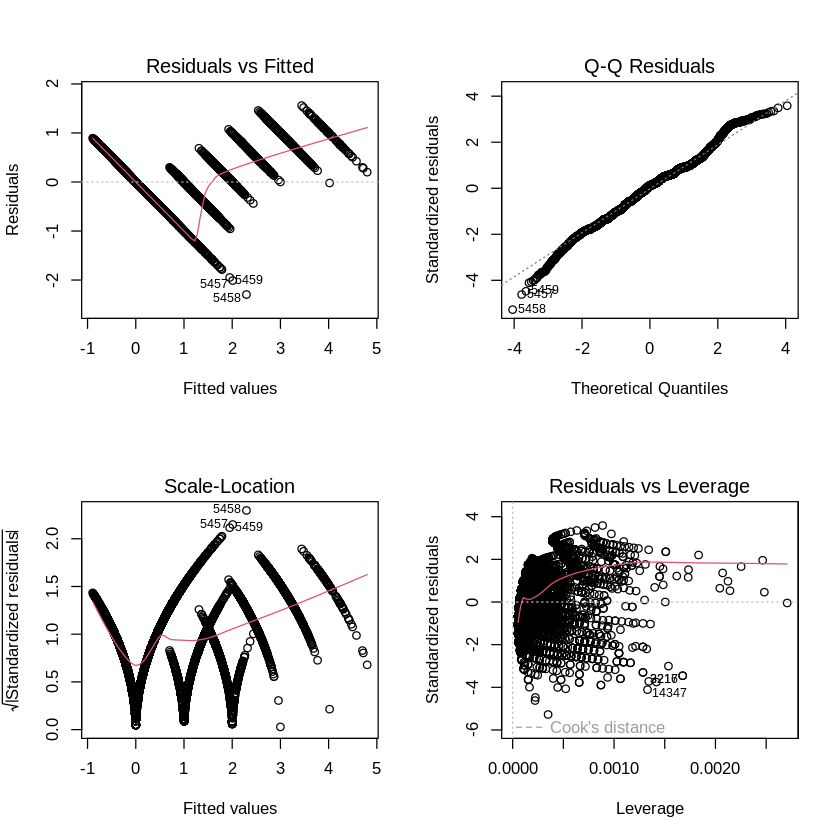

In [43]:
par(mfrow=c(2,2))
plot(linmodcats)

So there's obviously some irregularity. I'm honestly not sure what to make of this leverage plot... or the scale-location. Let's do our usual plots and just see. This is what happens when we mix these types of number structures together.

#Checking for Irregularity

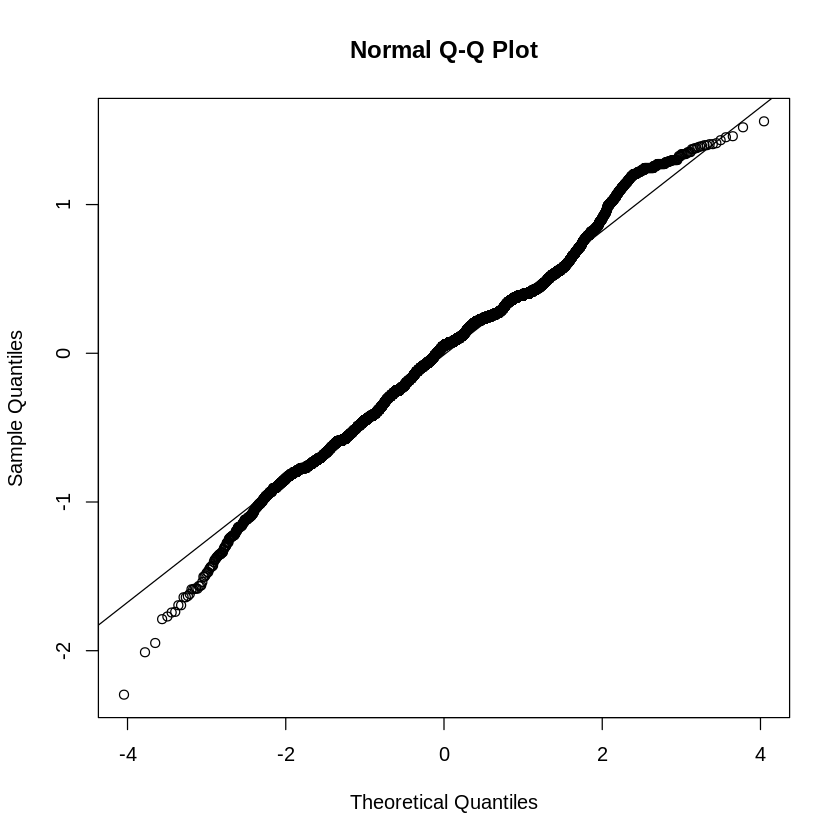

In [35]:
qqnorm(linmodcats$residuals)
qqline(linmodcats$residuals)

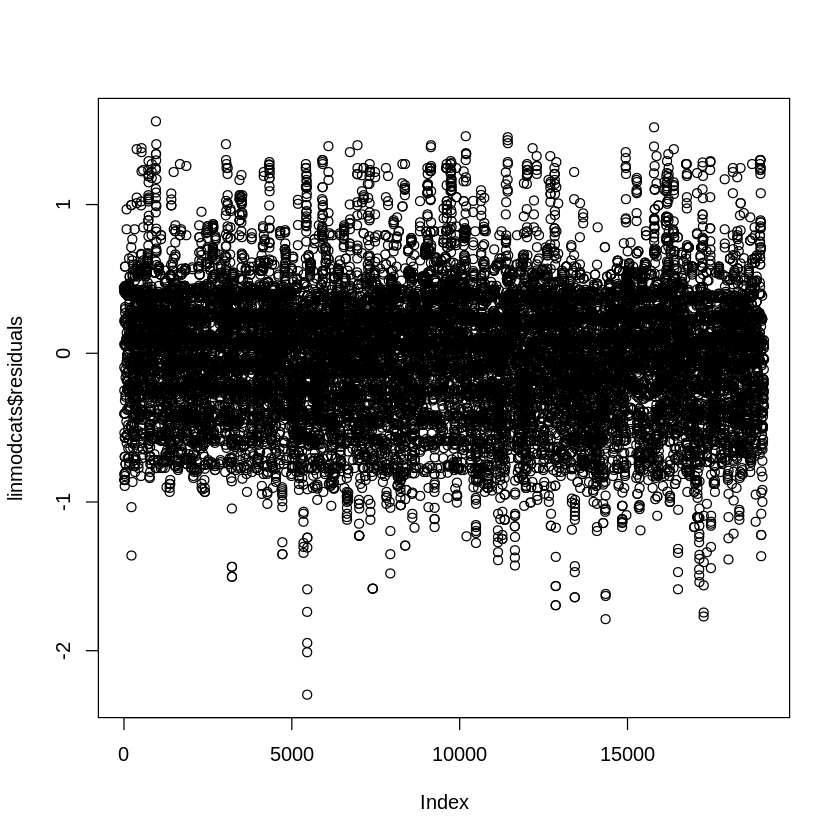

In [42]:
plot(linmodcats$residuals)

Note: So this is obviously not normal. We said before that this probably isn't linear. That's to be expected as the categories were whole numbers but the pressure and knots took on far more values. I suspect that it's fractal.

For now, we won't fix this, we expected this strangeness. Let's do a few predictions.

In [46]:
predict(linmodcats,newdata=data.frame(wind=120,pressure=900))
predict(linmodcats,newdata=data.frame(wind=40,pressure=1010))
predict(linmodcats,newdata=data.frame(wind=100,pressure=953))

1 
3.525432

1 
-0.01233211

1 
2.300043

Oh, a negative category! I wonder if this is a tropical storm, but these values were ficticiously created. Using actual pressure values and their mapped windspeeds should show something interesting.

##Conclusion

So the takeaway from this is that where this may not be an "appropriate" model (note the quotes because categories are specifically defined but we broke it with our own rules), it did generate something interesting.

Some sort of normalization scheme might lead to a more meaningful scale for categories. The particular scale used was the Saffir-Simpson scale.